In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_train_gray = tf.image.resize(x_train_gray, size=(28, 28))


In [ ]:
x_test_gray = tf.image.rgb_to_grayscale(x_test)
x_test_gray = tf.image.resize(x_test_gray, size=(28, 28))


In [ ]:
x_train_gray, x_test_gray = x_train_gray / 255.0, x_test_gray / 255.0


In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)


In [ ]:
CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

In [ ]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = CNN.fit(x_train_gray, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 11s 14ms/step - loss: 1.9447 - accuracy: 0.2805 - val_loss: 1.7270 - val_accuracy: 0.3666
Epoch 2/10
704/704 [==============================] - 8s 11ms/step - loss: 1.6955 - accuracy: 0.3835 - val_loss: 1.6112 - val_accuracy: 0.4148
Epoch 3/10
704/704 [==============================] - 10s 14ms/step - loss: 1.5938 - accuracy: 0.4248 - val_loss: 1.6066 - val_accuracy: 0.4204
Epoch 4/10
704/704 [==============================] - 9s 13ms/step - loss: 1.5332 - accuracy: 0.4482 - val_loss: 1.5323 - val_accuracy: 0.4480
Epoch 5/10
704/704 [==============================] - 9s 13ms/step - loss: 1.4800 - accuracy: 0.4737 - val_loss: 1.4361 - val_accuracy: 0.4864
Epoch 6/10
704/704 [==============================] - 10s 14ms/step - loss: 1.4435 - accuracy: 0.4851 - val_loss: 1.4438 - val_accuracy: 0.4780
Epoch 7/10
704/704 [==============================] - 9s 13ms/step - loss: 1.4126 - accuracy: 0.4979 - val_loss: 1.3863 - val_accuracy: 0.5

In [ ]:
test_loss, test_accuracy = CNN.evaluate(x_test_gray, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4038 - accuracy: 0.5022
Test accuracy: 0.5022000074386597


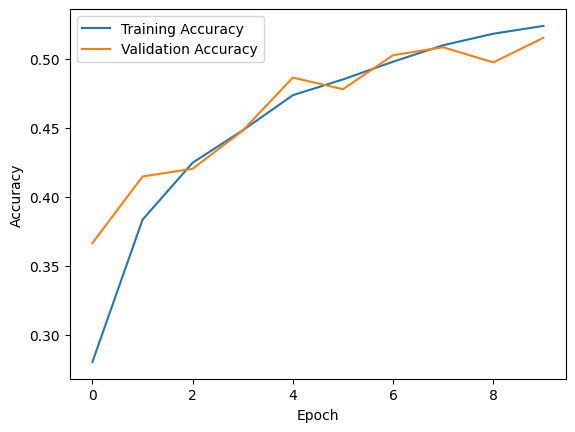

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Assigsment-6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')
print(data)


     Unnamed: 0 Date received  \
0             1    21-11-2022   
1             2    21-11-2022   
2             3    21-11-2022   
3             4    21-11-2022   
4             5    15-11-2022   
..          ...           ...   
96           97    07-11-2022   
97           98    21-11-2022   
98           99    09-11-2022   
99          100    21-11-2022   
100         101    05-11-2022   

                                               Product  \
0                                             Mortgage   
1    Credit reporting, credit repair services, or o...   
2    Credit reporting, credit repair services, or o...   
3    Credit reporting, credit repair services, or o...   
4    Credit reporting, credit repair services, or o...   
..                                                 ...   
96   Credit reporting, credit repair services, or o...   
97   Credit reporting, credit repair services, or o...   
98                         Checking or savings account   
99   Credit reporting, 

In [ ]:
data['complaint_text'] = data['complaint_text'].astype(str)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')  # Adjust num_words based on vocabulary size
tokenizer.fit_on_texts(data['complaint_text'])
sequences = tokenizer.texts_to_sequences(data['complaint_text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
labels = pd.get_dummies(data['category'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(labels.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Assignment-7

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [ ]:
train_data['text'] = train_data['text'].astype(str)
test_data['text'] = test_data['text'].astype(str)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['text'])
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
test_sequences = tokenizer.texts_to_sequences(test_data['text'])

In [ ]:
max_sequence_length = 100
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [ ]:
train_labels = pd.get_dummies(train_data['text'])
test_labels = pd.get_dummies(test_data['text'])

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(train_labels.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_padded_sequences, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
46/46 [==============================] - 13s 232ms/step - loss: 8.0941 - accuracy: 6.9204e-04 - val_loss: 8.8334 - val_accuracy: 0.0000e+00
Epoch 2/5
46/46 [==============================] - 8s 170ms/step - loss: 8.0484 - accuracy: 6.9204e-04 - val_loss: 9.8831 - val_accuracy: 0.0000e+00
Epoch 3/5
46/46 [==============================] - 12s 265ms/step - loss: 8.0223 - accuracy: 6.9204e-04 - val_loss: 10.2975 - val_accuracy: 0.0000e+00
Epoch 4/5
46/46 [==============================] - 12s 259ms/step - loss: 8.0142 - accuracy: 6.9204e-04 - val_loss: 10.5906 - val_accuracy: 0.0000e+00
Epoch 5/5
46/46 [==============================] - 9s 185ms/step - loss: 8.0090 - accuracy: 0.0000e+00 - val_loss: 10.7487 - val_accuracy: 0.0000e+00
